This is energy demo. 

In [1]:
# load bluesky engine and best effort callback
from bluesky.run_engine import RunEngine
RE= RunEngine()
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

#Load bluesky plans and stubs plan

In [2]:
import bluesky.plans as bp
import bluesky.plan_stubs as bps

Load all the devices in i10 dodal.

In [3]:
from dodal.beamlines.i10 import *
from dodal.devices.apple2_undulator import Pol

To connect all the devices, make use of make_all_devices

In [4]:
from dodal.utils import make_all_devices
devices, error = make_all_devices("dodal.beamlines.i10",connect_immediately = True)
print(error)

{}


List connected devices

In [5]:
devices

{'rasor_femto_drain_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7f7b6af9c590>,
 'rasor_sr570_drain_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7f7b68431610>,
 'rasor_femto_fluo_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7f7b6b00e190>,
 'rasor_sr570_fluo_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7f7b68432510>,
 'rasor_femto_pa_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7f7b68432210>,
 'rasor_sr570_pa_scaler_det': <dodal.devices.current_amplifiers.current_amplifier_detector.CurrentAmpDet at 0x7f7b68432f90>,
 'rasor_sr570': <dodal.devices.i10.rasor.rasor_current_amp.RasorSR570 at 0x7f7b683fcb90>,
 'rasor_det_scalers': <dodal.devices.i10.rasor.rasor_scaler_cards.RasorScalerCard1 at 0x7f7b683e9250>,
 'rasor_femto': <dodal.devices.i10.rasor.rasor_

In [ ]:
Helper to print out positions.

In [6]:
async def get_energy_position():
    print(await devices["idu"].energy.read())
    print(await devices["idu"].energy.id.gap.read())
    print(await devices["idu"].energy.id.phase.read())
    print(await devices["idu"].pol.read())

In [ ]:
Change polarisation. 

In [21]:
await get_energy_position()
await devices["idu"].pol.set(Pol.PC)
await get_energy_position()

{'idu-energy-id-energy': {'value': 838.0, 'timestamp': 1758115124.7045486, 'alarm_severity': 0}, 'pgm-energy': {'value': 837.9808, 'timestamp': 1758115125.466398, 'alarm_severity': 0}}
{'idu-energy-id-gap-user_readback': {'value': 22.893950000000004, 'timestamp': 1758115124.488658, 'alarm_severity': 0}}
{'idu-energy-id-phase-btm_outer-user_readback': {'value': 0.0, 'timestamp': 1758115124.837676, 'alarm_severity': 0}, 'idu-energy-id-phase-top_inner-user_readback': {'value': 0.0, 'timestamp': 1758115124.837601, 'alarm_severity': 0}, 'idu-energy-id-phase-top_outer-user_readback': {'value': 16.229, 'timestamp': 1758115124.837563, 'alarm_severity': 0}, 'idu-energy-id-phase-btm_inner-user_readback': {'value': 16.229, 'timestamp': 1758115124.837638, 'alarm_severity': 0}}
{'idu-energy-id-polarisation': {'value': <Pol.PC: 'pc'>, 'timestamp': 1758115124.837676, 'alarm_severity': 0}}
{'idu-energy-id-energy': {'value': 838.0, 'timestamp': 1758115156.6244273, 'alarm_severity': 0}, 'pgm-energy': {'

In [ ]:
Turn off autogain

In [13]:
await devices["rasor_femto_fluo_scaler_det"].auto_mode.set(False)

In [ ]:
Perform energy scan



Transient Scan ID: 2     Time: 2025-09-17 14:17:42
Persistent Unique Scan ID: '7274f4ed-4fdc-46c2-b847-4126443396f6'
New stream: 'primary'
+-----------+------------+----------------------+------------+-------------------------------------+
|   seq_num |       time | idu-energy-id-energy | pgm-energy | rasor_femto_fluo_scaler_det-current |
+-----------+------------+----------------------+------------+-------------------------------------+
|         1 | 14:17:52.5 |              830.000 | 829.99960000 |                               0.000 |
|         2 | 14:17:54.7 |              830.333 | 830.34070000 |                               0.000 |
|         3 | 14:17:57.7 |              830.667 | 830.67980000 |                               0.000 |
|         4 | 14:18:00.2 |              831.000 | 831.01120000 |                               0.000 |
|         5 | 14:18:02.3 |              831.333 | 831.33250000 |                               0.000 |
|         6 | 14:18:04.6 |              8

('7274f4ed-4fdc-46c2-b847-4126443396f6',)

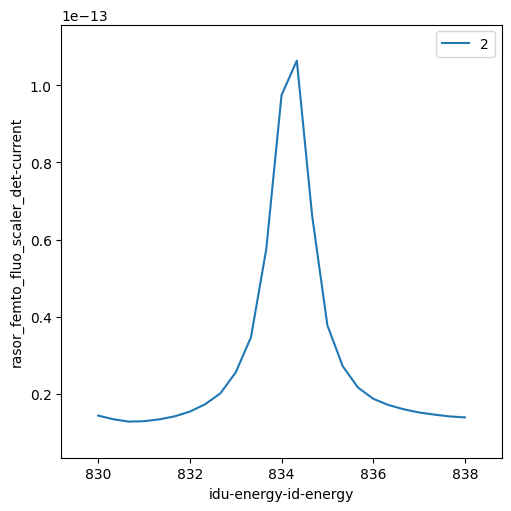

In [20]:
RE(bp.scan([devices["rasor_femto_fluo_scaler_det"]],devices["idu"].energy, 830, 838, 25),bec)